# ABOUT THE FEATURES

**Total Investment:** It refers to all spending on capital goods in an economy during a given period like machinery, equipment, infrastructure; it indicates economic growth and development.

**Gross National Savings:** It consists of total savings within an economy (including personal, government, and business savings) minus capital consumption; it tells whether a country can invest locally or internationally.

**General Government Revenue:** This is the total amount of money that a government gets from taxes, fees, and any other money collection methods.

**General Government Total Expenditure:** It is the entire amount of money that a government spends on goods and services, infrastructure projects, social programs as well as debt repayment.

**General Government Net Lending/Borrowing:** This can be defined as government’s revenue less expenditure excluding interest payments. Positive means surplus while negative shows deficit.

**General Government Primary Net Lending/Borrowing:** It is net lending/borrowing but without interest payments; it measures how far the government can go in meeting costs without considering interests.

**General Government Net Debt:** It represents the state’s overall financial obligations which include loans taken by the central or local authorities as well as debts owed by public enterprises to governmental authorities.

**General Government Gross Debt:** It is the total amount of debt accumulated by a government over time, encompassing both domestic and foreign debt.

**Current Account Balance:** This represents the difference between a country's savings and its investment, considering imports, exports of goods, services, and transfers.

**Exports of Goods and Services:** This measures the total value of goods and services sold by a country to foreign entities.

**Annual Inflation, Consumer Prices:** This reflects the percentage increase in the average price level of goods and services within a country over a specified period, indicating the rate of inflation.

**Imports of Goods and Services:** This measures the total value of goods and services purchased by a country from foreign entities.

**Expense:** In financial terms, expenses refer to the costs incurred by an entity (such as the government) to generate revenue or maintain operations.

**Domestic Credit to Private Sector:** This reflects the amount of credit available from domestic sources (like banks) to the private sector for various purposes, including investment and consumption.

**Research and Development Expenditure:** This indicates the resources allocated by a country to research and development activities, crucial for innovation and technological advancement.

**Tax Revenue:** This represents the income received by the government through various taxes levied on individuals, businesses, and other entities, constituting a significant source of government revenue.


In [12]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df = pd.read_csv('final_dataset.csv')

# Preprocessing Data

In [2]:
# Get numerical columns
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]

# Transform categorical into numerical and fill with mean
df['General government primary net lending/borrowing (% of GDP)'] = pd.to_numeric(df['General government primary net lending/borrowing (% of GDP)'], errors='coerce')
df['Current account balance (% of GDP)'] = pd.to_numeric(df['Current account balance (% of GDP)'], errors='coerce')

mean_lending_borrowing = df['General government primary net lending/borrowing (% of GDP)'].mean()
mean_account_balance = df['Current account balance (% of GDP)'].mean()

df['General government primary net lending/borrowing (% of GDP)'].fillna(mean_lending_borrowing, inplace=True)
df['Current account balance (% of GDP)'].fillna(mean_account_balance, inplace=True)

# Fill numerical columns with mean
for column in df[numerical_cols].columns:
    df[column].fillna(df[column].mean(), inplace=True)


# Splitting Data

In [3]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['GDP GROWTH']), df['GDP GROWTH'], train_size=0.8, test_size=0.2, random_state=0)

# Train Models

In [4]:
# Define a function for training and evaluation
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, param_grid, cv=5):
    model_pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])
    grid_search = GridSearchCV(model_pipeline, param_grid, cv=cv, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    
    predictions = best_model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r_squared = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    
    return mse, r_squared, mae, grid_search.best_params_, best_model

# Define the parameter grid for each model
etr_param_grid = {
    'model__n_estimators': [100,200,300],
    'model__max_depth': [None,10,20]
}

rfr_param_grid = {
    'model__n_estimators': [100,200,300],
    'model__max_depth': [None,10,20]
}

knr_param_grid = {
    'model__n_neighbors': [3,5,7,10]
}


In [5]:
# Train and evaluate Extra Trees Regressor with Grid Search
etr = ExtraTreesRegressor(random_state=42)
etr_mse, etr_r_squared, etr_mae, etr_best_params, etr_best_model = train_and_evaluate_model(etr, X_train, X_test, y_train, y_test, etr_param_grid)
print(f"Extra Trees Regressor: Mean Squared Error (MSE): {etr_mse}, R-squared (R²): {etr_r_squared}, Mean Absolute Error (MAE): {etr_mae}")
print("Best parameters:", etr_best_params)

Extra Trees Regressor: Mean Squared Error (MSE): 19.19827429823649, R-squared (R²): 0.1983156663790281, Mean Absolute Error (MAE): 2.5059769983601234
Best parameters: {'model__max_depth': None, 'model__n_estimators': 300}


In [6]:
# Train and evaluate Random Forest Regressor with Grid Search
rfr = RandomForestRegressor(random_state=42)
rfr_mse, rfr_r_squared, rfr_mae, rfr_best_params, rfr_best_model = train_and_evaluate_model(rfr, X_train, X_test, y_train, y_test, rfr_param_grid)
print(f"Random Forest Regressor: Mean Squared Error (MSE): {rfr_mse}, R-squared (R²): {rfr_r_squared}, Mean Absolute Error (MAE): {rfr_mae}")
print("Best parameters:", rfr_best_params)

Random Forest Regressor: Mean Squared Error (MSE): 20.4766546723212, R-squared (R²): 0.14493287257206766, Mean Absolute Error (MAE): 2.574092671218331
Best parameters: {'model__max_depth': 20, 'model__n_estimators': 300}


In [7]:
# Train and evaluate K Neighbors Regressor with Grid Search
knr = KNeighborsRegressor()
knr_mse, knr_r_squared, knr_mae, knr_best_params, knr_best_model = train_and_evaluate_model(knr, X_train, X_test, y_train, y_test, knr_param_grid)
print(f"K Neighbors Regressor: Mean Squared Error (MSE): {knr_mse}, R-squared (R²): {knr_r_squared}, Mean Absolute Error (MAE): {knr_mae}")
print("Best parameters:", knr_best_params)


K Neighbors Regressor: Mean Squared Error (MSE): 21.818701303045877, R-squared (R²): 0.08889149394984364, Mean Absolute Error (MAE): 2.716724828032164
Best parameters: {'model__n_neighbors': 7}


# Evaluate Models

In [8]:
def create_model_eval_dataframe(model_name, mse, r_squared, mae, best_params):
    data = {
        'Model': [model_name],
        'Mean Squared Error (MSE)': [mse],
        'R-squared (R²)': [r_squared],
        'Mean Absolute Error (MAE)': [mae]
    }
    data.update(best_params)
    return pd.DataFrame(data)

# Create DataFrames for each model
etr_df = create_model_eval_dataframe('Extra Trees Regressor', etr_mse, etr_r_squared, etr_mae, etr_best_params)
rfr_df = create_model_eval_dataframe('Random Forest Regressor', rfr_mse, rfr_r_squared, rfr_mae, rfr_best_params)
knr_df = create_model_eval_dataframe('K Neighbors Regressor', knr_mse, knr_r_squared, knr_mae, knr_best_params)

# Concatenate DataFrames into a single DataFrame
models_df = pd.concat([etr_df, rfr_df, knr_df], ignore_index=True)
models_df

,Model,Mean Squared Error (MSE),R-squared (R²),Mean Absolute Error (MAE),model__max_depth,model__n_estimators,model__n_neighbors
0,Extra Trees Regressor,19.198274,0.198316,2.505977,NaN,300.0,NaN
1,Random Forest Regressor,20.476655,0.144933,2.574093,20.0,300.0,NaN
2,K Neighbors Regressor,21.818701,0.088891,2.716725,NaN,NaN,7.0


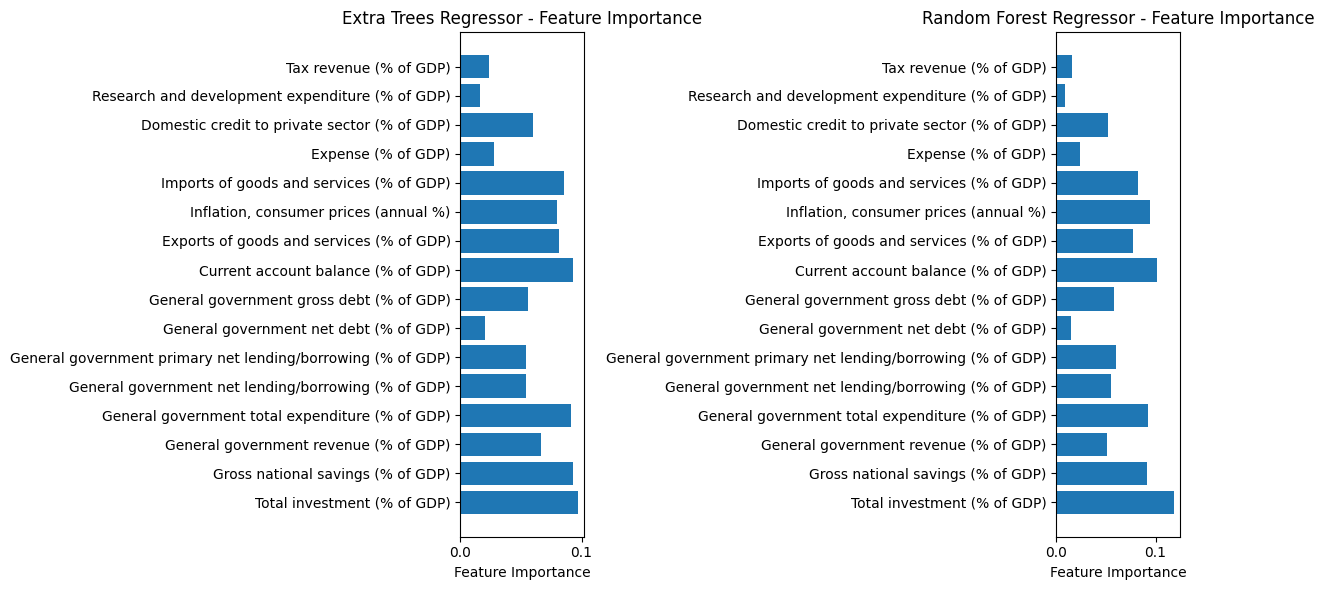

In [9]:
# Get feature importance for Extra Trees Regressor
if hasattr(etr_best_model.named_steps['model'], 'feature_importances_'):
    etr_feature_importance = etr_best_model.named_steps['model'].feature_importances_
    etr_feature_names = X_train.columns  # Assuming X_train is your training data
    etr_feature_importance_df = pd.DataFrame({'Feature': etr_feature_names, 'Importance': etr_feature_importance})
    etr_feature_importance_df = etr_feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Get feature importance for Random Forest Regressor
if hasattr(rfr_best_model.named_steps['model'], 'feature_importances_'):
    rfr_feature_importance = rfr_best_model.named_steps['model'].feature_importances_
    rfr_feature_names = X_train.columns  # Assuming X_train is your training data
    rfr_feature_importance_df = pd.DataFrame({'Feature': rfr_feature_names, 'Importance': rfr_feature_importance})
    rfr_feature_importance_df = rfr_feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12, 6))

# Plot Extra Trees Regressor feature importance
plt.subplot(1, 2, 1)
if etr_feature_importance is not None:
    plt.barh(etr_feature_names, etr_feature_importance)
    plt.xlabel('Feature Importance')
    plt.title('Extra Trees Regressor - Feature Importance')
else:
    plt.text(0.5, 0.5, 'Feature Importance not available', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Plot Random Forest Regressor feature importance
plt.subplot(1, 2, 2)
if rfr_feature_importance is not None:
    plt.barh(rfr_feature_names, rfr_feature_importance)
    plt.xlabel('Feature Importance')
    plt.title('Random Forest Regressor - Feature Importance')
else:
    plt.text(0.5, 0.5, 'Feature Importance not available', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


## Important to note that Total Investment is the most important feature for predicting GDP Growth, 
## this is relevant for policy-making involving how much should be invested each year

## As K-Neighbors model doesn't have a native feature importance function in scikit-learn
## I tried to create one to get the features' importance

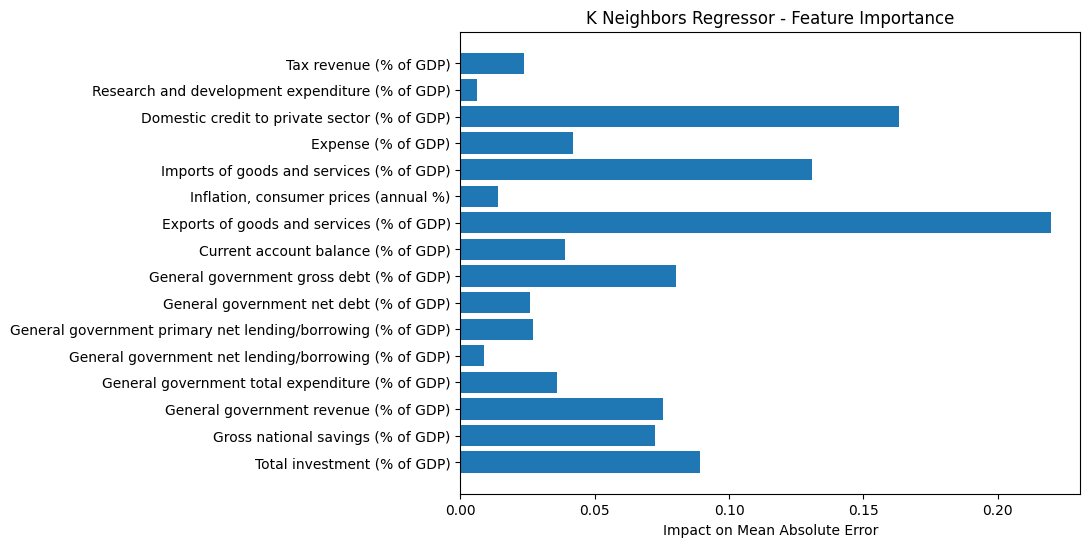

In [10]:

feature_names = X_train.columns  

feature_importance_knr = []
for feature in feature_names:
    # Create a copy of test data
    X_test_modified = X_test.copy() 
    # Replace feature values with their mean
    X_test_modified[feature] = X_test_modified[feature].mean()  
    
    # Make predictions with modified data
    knr_predictions_modified = knr_best_model.predict(X_test_modified)
    
    # Calculate mean absolute error with modified data
    mae_modified = mean_absolute_error(y_test, knr_predictions_modified)
    
    # Calculate difference in performance from the original predictions
    importance = mae_modified - knr_mae 
    feature_importance_knr.append(importance)

# Plotting feature importance for K Neighbors Regressor
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importance_knr)
plt.xlabel('Impact on Mean Absolute Error')
plt.title('K Neighbors Regressor - Feature Importance')
plt.show()
